In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [2]:
print('here')

here


In [3]:
# !nvidia-smi

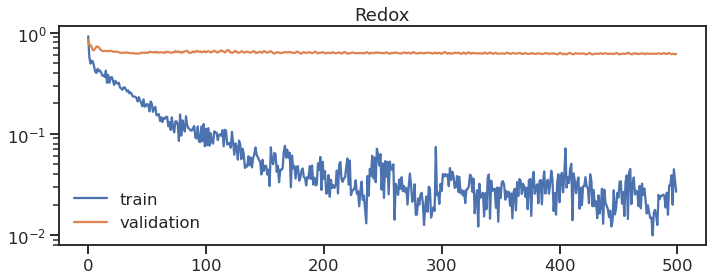

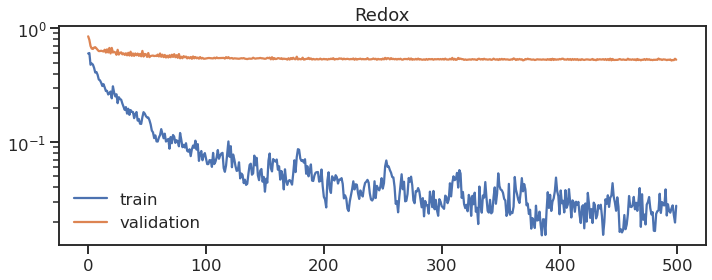

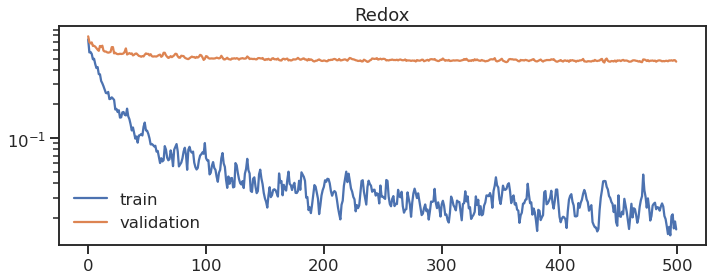

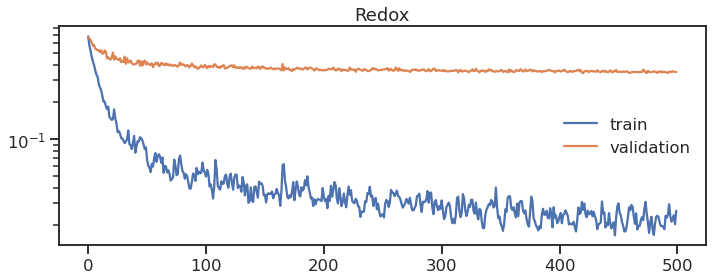

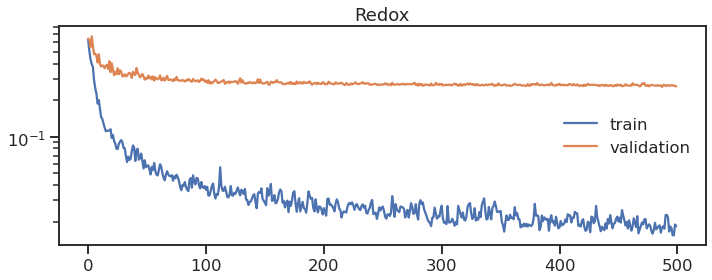

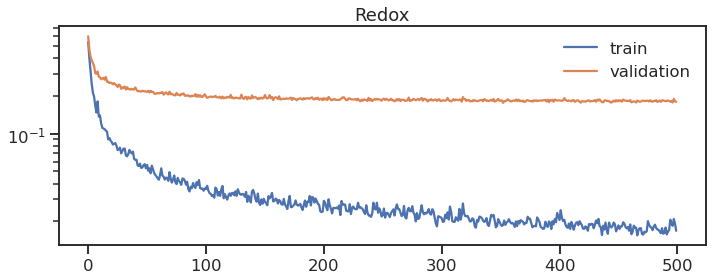

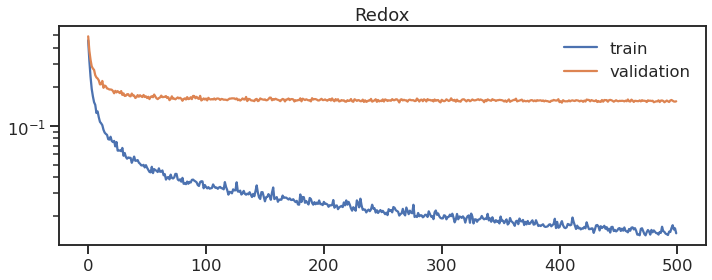

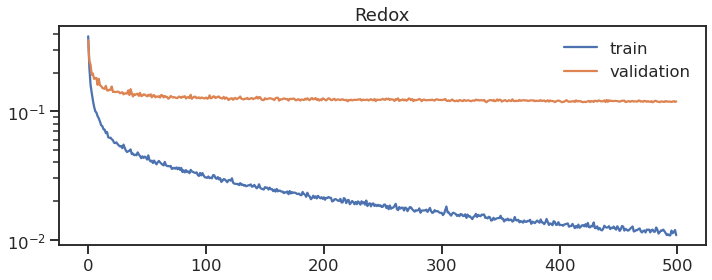

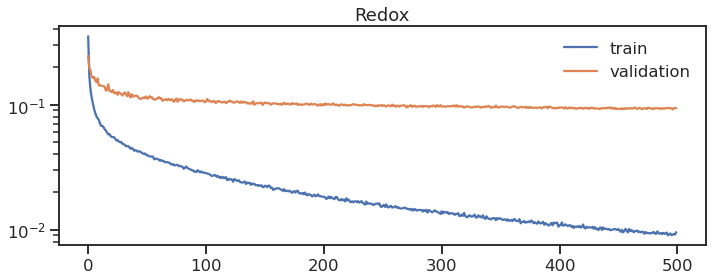

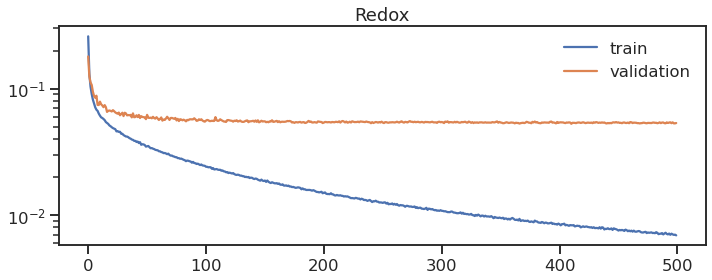

In [4]:
num_train = np.logspace(2, 4.9, num=10,dtype=int)

for num in num_train:
    fig, axs = plt.subplots(ncols=1, sharex=True, figsize=(10, 4))
    log1 = pd.read_csv('train_number/n_{0}/log.csv'.format(num)).set_index('epoch')
#     axs[0].plot(log1['spin_loss'], label='train')
#     axs[0].plot(log1['val_spin_loss'], label='validation')
#     axs[0].set_title('Spin')

#     axs[1].plot(log1['bur_vol_loss'])
#     axs[1].plot(log1['val_bur_vol_loss'])
#     axs[1].set_title('Buried Volume')
    
    axs.plot(log1['loss'],label='train')
    axs.plot(log1['val_loss'],label='validation')
    axs.set_title('Redox')
   
    axs.set_yscale('log')

#     for ax in axs:
#         ax.set_yscale('log')

#     print(log1.min())
    axs.legend()

    plt.tight_layout()
# plt.xlim([0, 10])

In [5]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
import nfp

# Spin and buried volume

In [6]:
from preprocessor import preprocessor
# preprocessor.from_json('tfrecords_spin_bv/preprocessor.json')

# from loss import AtomInfMask, KLWithLogits
# from nfp import EdgeUpdate, NodeUpdate, GlobalUpdate

# model = tf.keras.models.load_model(
#     '20200901_combined_losses/best_model.hdf5',
#     custom_objects={**nfp.custom_objects,
#                     **{'AtomInfMask': AtomInfMask, 'KLWithLogits': KLWithLogits,
#                        'EdgeUpdate': EdgeUpdate,
#                        'NodeUpdate': NodeUpdate,
#                        'GlobalUpdate': GlobalUpdate}})

In [7]:
# cdf_spin = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/cdf_spins.csv.gz')
# cdf_bv = pd.read_csv('/projects/rlmolecule/pstjohn/atom_spins/cdf_buried_volume.csv.gz', index_col=0)
# cdf = cdf_spin.merge(cdf_bv, on=['smiles', 'atom_index'], how='left')

# test = np.load('split.npz', allow_pickle=True)['test']

In [8]:
# cdf_test = cdf[cdf.smiles.isin(test)].copy()
# cdf_test['fractional_spin'] = cdf_test.groupby('smiles').spin.apply(lambda x: x.abs() / x.abs().sum())

In [9]:
redox_df = pd.read_csv('/projects/rlmolecule/pstjohn/spin_gnn/redox_data.csv.gz')
data = np.load('redox_split.npz', allow_pickle=True)
redox_valid = redox_df[redox_df.smiles.isin(np.concatenate([data['valid'], data['test']]))]

In [10]:
# test_dataset = tf.data.Dataset.from_generator(
#     lambda: (preprocessor.construct_feature_matrices(smiles, train=False) for smiles in test),
#     output_types=preprocessor.output_types,
#     output_shapes=preprocessor.output_shapes)\
#     .padded_batch(batch_size=128, padded_shapes=preprocessor.padded_shapes(max_atoms=cdf_test.atom_index.max() + 1),
#                   padding_values=preprocessor.padding_values)

In [11]:
test_dataset = tf.data.Dataset.from_generator(
    lambda: (preprocessor.construct_feature_matrices(smiles, train=False) for smiles in redox_valid.smiles),
    output_types=preprocessor.output_types,
    output_shapes=preprocessor.output_shapes)\
    .padded_batch(batch_size=128, padded_shapes=preprocessor.padded_shapes(),
                  padding_values=preprocessor.padding_values)

In [12]:
# predicted_spin_logits, predicted_bur_vol = model.predict(test_dataset, verbose=1)
# predicted_fractional_spins = tf.nn.softmax(predicted_spin_logits)

In [13]:
# cdf_test_pivot_spins = cdf_test.pivot(index='smiles', columns='atom_index', values='fractional_spin')
# cdf_test_pivot_spins = cdf_test_pivot_spins.reindex(test)

# cdf_test_pivot_bur_vol = cdf_test.pivot(index='smiles', columns='atom_index', values='buried_vol')
# cdf_test_pivot_bur_vol = cdf_test_pivot_bur_vol.reindex(test)

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5,4))
# axs[0].plot(cdf_test_pivot_spins.values.flatten(), predicted_fractional_spins.numpy().flatten(), '.', ms=1)
# axs[0].text(.95, .05, f'MAE: {pd.Series(cdf_test_pivot_spins.values.flatten() - predicted_fractional_spins.numpy().flatten()).dropna().abs().mean():.4f}', ha='right',
#             transform=axs[0].transAxes, fontsize=14)

# axs[1].plot(cdf_test_pivot_bur_vol.values.flatten(), predicted_bur_vol.flatten(), '.', ms=1)
# axs[1].text(.95, .05, f'MAE: {pd.Series(cdf_test_pivot_bur_vol.values.flatten() - predicted_bur_vol.flatten()).dropna().abs().mean():.4f}', ha='right',
#             transform=axs[1].transAxes, fontsize=14)

# axs[0].set_title('Spin')
# axs[1].set_title('Buried Volume')

In [14]:
# rpredicted_spin_logits, rpredicted_bur_vol = model.predict(redf_dataset, verbose=1)
# rpredicted_fractional_spins = tf.nn.softmax(rpredicted_spin_logits)

In [15]:
# redf_pivot_spins = redf.pivot(index='smiles', columns='atom_index', values='fractional_spin')
# redf_pivot_spins = redf_pivot_spins.reindex(redf_smiles)

# redf_pivot_bur_vol = redf.pivot(index='smiles', columns='atom_index', values='bur_vol')
# redf_pivot_bur_vol = redf_pivot_bur_vol.reindex(redf_smiles)

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5,4))
# axs[0].plot(redf_pivot_spins.values.flatten(), rpredicted_fractional_spins.numpy().flatten(), '.', ms=1)
# axs[0].text(.95, .05, f'MAE: {pd.Series(redf_pivot_spins.values.flatten() - rpredicted_fractional_spins.numpy().flatten()).dropna().abs().mean():.4f}', ha='right',
#             transform=axs[0].transAxes, fontsize=14)

# axs[1].plot(redf_pivot_bur_vol.values.flatten(), rpredicted_bur_vol.flatten(), '.', ms=1)
# axs[1].text(.95, .05, f'MAE: {pd.Series(redf_pivot_bur_vol.values.flatten() - rpredicted_bur_vol.flatten()).dropna().abs().mean():.4f}', ha='right',
#             transform=axs[1].transAxes, fontsize=14)

# axs[0].set_title('Spin')
# axs[1].set_title('Buried Volume')

# Redox based

In [16]:
# from preprocess_inputs import preprocessor
# preprocessor.from_json('tfrecords/preprocessor.json')

from loss import AtomInfMask, KLWithLogits
from nfp import EdgeUpdate, NodeUpdate, GlobalUpdate
import tensorflow_addons as tfa

In [17]:
# log = pd.read_csv('20200903_xfer_h2o/log.csv').set_index('epoch')
# plt.semilogy(log['val_redox_loss'], label='Transferred weights')
# plt.semilogy(log['redox_loss'])

# log = pd.read_csv('20200903_xfer_h2o_noinit/log.csv').set_index('epoch')
# plt.semilogy(log['val_redox_loss'], label='No initialization')
# plt.semilogy(log['redox_loss'])

# log = pd.read_csv('20200903_xfer_h2o_frozen/log.csv').set_index('epoch')
# plt.semilogy(log['val_redox_loss'], label='Xfer with frozen model')
# plt.semilogy(log['redox_loss'])

# plt.legend()

16/16 [==============================] - 3s 169ms/step
[[100, 0.724105394872976, 0.5384829399912451]]
16/16 [==============================] - 2s 114ms/step
[[100, 0.724105394872976, 0.5384829399912451], [210, 0.605457330957522, 0.47356186781926596]]
16/16 [==============================] - 2s 116ms/step
[[100, 0.724105394872976, 0.5384829399912451], [210, 0.605457330957522, 0.47356186781926596], [441, 0.5152688924258872, 0.4232852291873797]]
16/16 [==============================] - 2s 133ms/step
[[100, 0.724105394872976, 0.5384829399912451], [210, 0.605457330957522, 0.47356186781926596], [441, 0.5152688924258872, 0.4232852291873797], [926, 0.3917258751808124, 0.30733976563781906]]
16/16 [==============================] - 2s 111ms/step
[[100, 0.724105394872976, 0.5384829399912451], [210, 0.605457330957522, 0.47356186781926596], [441, 0.5152688924258872, 0.4232852291873797], [926, 0.3917258751808124, 0.30733976563781906], [1944, 0.30435642592348666, 0.2199786444138318]]
16/16 [=========

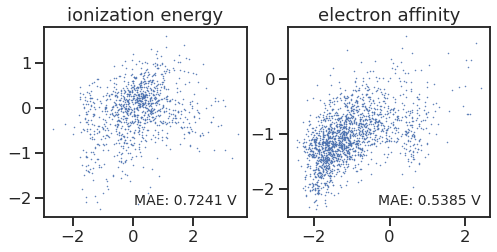

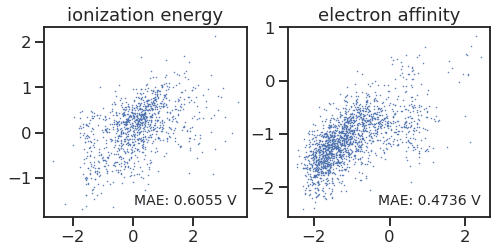

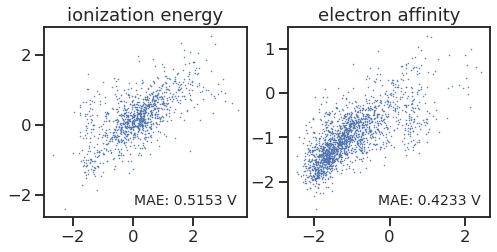

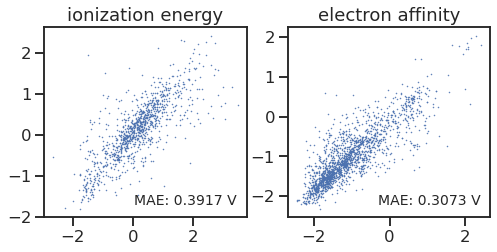

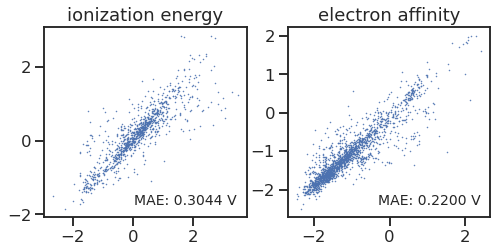

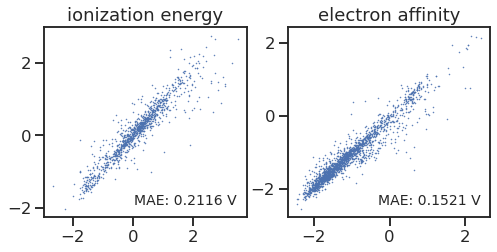

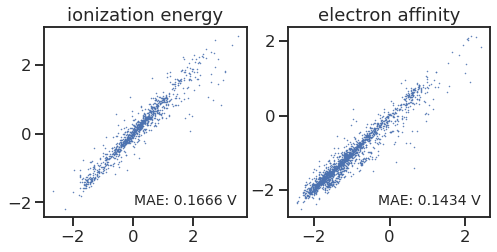

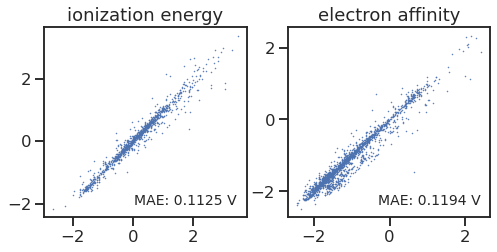

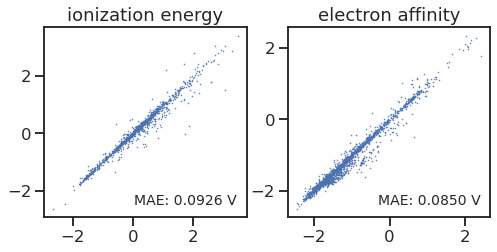

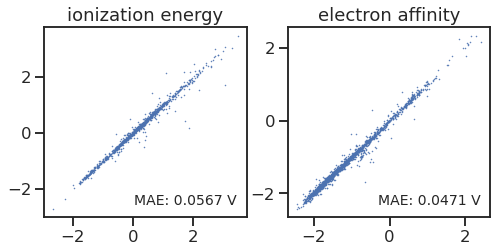

In [18]:
num_train = np.logspace(2, 4.9, num=10,dtype=int)

mae_array = []
for num in num_train:
    model = tf.keras.models.load_model(
        'train_number/n_{0}/best_model.hdf5'.format(num),
        custom_objects={**nfp.custom_objects,
                        **{'EdgeUpdate': EdgeUpdate,
                           'NodeUpdate': NodeUpdate,
                           'GlobalUpdate': GlobalUpdate}})
    predicted_redox = model.predict(test_dataset, verbose=1)

    # Plot graphs

    fig, axs = plt.subplots(ncols=2, figsize=(8,3.5))
    axs[0].plot(redox_valid['ionization energy'], predicted_redox[:, 0], '.', ms=1)
    axs[1].plot(redox_valid['electron affinity'], predicted_redox[:, 1], '.', ms=1)

    axs[0].text(.95, .05, f"MAE: {(redox_valid['ionization energy'] - predicted_redox[:, 0]).abs().mean():.4f} V", ha='right', va='bottom', transform=axs[0].transAxes, fontsize=14)
    axs[1].text(.95, .05, f"MAE: {(redox_valid['electron affinity'] - predicted_redox[:, 1]).abs().mean():.4f} V", ha='right', va='bottom', transform=axs[1].transAxes, fontsize=14)

    axs[0].set_title('ionization energy')
    axs[1].set_title('electron affinity')
    mae_array.append([num,(redox_valid['ionization energy'] - predicted_redox[:, 0]).abs().mean(),(redox_valid['electron affinity'] - predicted_redox[:, 1]).abs().mean()])
    
    print(mae_array)

In [19]:
ea_mae = []
ie_mae = []
num_train_all = []
for i in range(len(mae_array)):
    num_train_all.append(mae_array[i][0])
    ie_mae.append(mae_array[i][1])
    ea_mae.append(mae_array[i][2])
print(len(ea_mae),len(ie_mae)) 

10 10


In [20]:
from scipy import stats

ie_mae_log,ea_mae_log,num_train_log =[],[],[]
for i in range(len(mae_array)):
    ie_mae_log.append(np.log(mae_array[i][1]))
    ea_mae_log.append(np.log(mae_array[i][2]))
    num_train_log.append(np.log(mae_array[i][0]))
# print(num_train_log,ie_mae_log,ea_mae_log)

X = np.array(num_train_log)
Yie = np.array(ie_mae_log)
Yea = np.array(ea_mae_log)
# print(X,Yie,Yea)

slope_ie, intercept_ie, r_value_ie, p_value_ie, std_err_ie = stats.linregress(X,Yie)
slope_ea, intercept_ea, r_value_ea, p_value_ea, std_err_ea = stats.linregress(X,Yea)

print('intercept_ie:', intercept_ie)
print('intercept_ea:', intercept_ea)

print('slope_ie:', slope_ie)
print('slope_ea:', slope_ea)
print(len(ea_mae),len(ie_mae)) 

intercept_ie: 1.5842544004462633
intercept_ea: 1.1469376795886632
slope_ie: -0.38061117975957626
slope_ea: -0.35073047915810235
10 10


In [21]:
Y_target = np.log(0.043)
xie = (Y_target - intercept_ie)/slope_ie
xea = (Y_target - intercept_ea)/slope_ea

print('x_needed_ie:',np.exp(xie))
print('x_needed_ea:',np.exp(xea))
print(len(ea_mae),len(ie_mae)) 

x_needed_ie: 250072.86946499487
x_needed_ea: 207227.64972192384
10 10


In [22]:
ea_mae_ex =  ea_mae.copy()
ie_mae_ex = ie_mae.copy()

print(len(ea_mae),len(ie_mae)) 

ea_mae_ex.append(0.025)
ie_mae_ex.append(0.025)
print(len(ea_mae),len(ie_mae)) 

num_train_ea = num_train_all.copy()
num_train_ie = num_train_all.copy()

print(len(num_train_ea),len(num_train_ie))

num_train_ea.append(174387)
num_train_ie.append(361013)

print(len(num_train_ea),len(num_train_ie))
print(len(num_train))

num_train = num_train_all.copy()

ie_mae_log,ea_mae_log,num_train_ie_log,num_train_ea_log =[],[],[],[]
for i in range(len(ie_mae_ex)):
    print(i)
    ie_mae_log.append(np.log10(ie_mae_ex[i]))
    ea_mae_log.append(np.log10(ea_mae_ex[i]))
    num_train_ie_log.append(np.log10(num_train_ie[i]))
    num_train_ea_log.append(np.log10(num_train_ea[i]))
print(len(ie_mae_log),len(ea_mae_log))
print(len(num_train),len(ie_mae),len(ea_mae))

10 10
10 10
10 10
11 11
10
0
1
2
3
4
5
6
7
8
9
10
11 11
10 10 10


In [23]:
ie_mae_ = []
ea_mae_ = []
num_train_ = []
for i in range(7):
    ie_mae_.append(ie_mae[i])
    ea_mae_.append(ea_mae[i])
    num_train_.append(num_train[i])
print(len(ie_mae_),len(ea_mae_),len(num_train_))

7 7 7


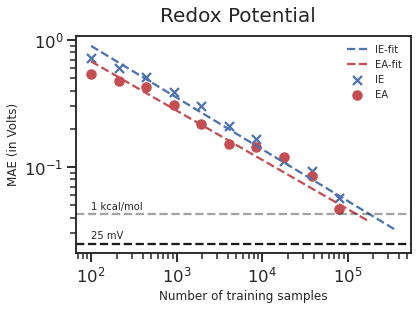

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(num_train, ie_mae, c='b', marker="x", label='IE')
ax1.scatter(num_train, ea_mae, c='r', marker="o", label='EA')

z_ie = np.polyfit(num_train_ie_log,ie_mae_log, 1)
z_ea = np.polyfit(num_train_ea_log,ea_mae_log, 1)

p_ie = np.poly1d(z_ie)
p_ea = np.poly1d(z_ea)

x_ie, y_ie = [],[]
for i in range(len(ie_mae_log)):
    x_ie.append(10**(num_train_ie_log[i]))
    y_ie.append(10**(p_ie(num_train_ie_log[i])))

x_ea, y_ea = [],[]
for i in range(len(ea_mae_log)):
    x_ea.append(10**(num_train_ea_log[i]))
    y_ea.append(10**(p_ea(num_train_ea_log[i])))


ax1.plot(x_ie, y_ie, c='b', label='IE-fit',linestyle='dashed')
ax1.plot(x_ea, y_ea, c='r', label='EA-fit',linestyle='dashed')

# ys_ie = p_ie(num_train_ie)
# ys_ea = p_ea(num_train_ea)

# plt.plot(num_train_ie_log,ie_mae_log)
# plt.plot(num_train_ea_log,ea_mae_log)
# plt.plot(num_train_ie,ys_ie)
# plt.plot(num_train_ea,ys_ea)


# z_ie = np.polyfit(np.log10(num_train_ie), np.log10(ie_mae_ex), 1)
# z_ea = np.polyfit(np.log10(num_train_ea), np.log10(ea_mae_ex), 1)

# p_ie = np.poly1d(z_ie)
# p_ea = np.poly1d(z_ea)

# plt.plot(10**(np.array(ie_mae_log)),10**(p_ie(ie_mae_log)))
# plt.plot(10**(ea_mae_log),10**(p_ea(ea_mae_log)))


fig.suptitle('Redox Potential', fontsize=20)

ax1.set_xscale('log')
ax1.set_yscale('log')
# plt.xscale('log')
# plt.yscale('log')


plt.axhline(y=0.025, color='k', linestyle='--')
plt.axhline(y=0.043, color='k', linestyle='--',alpha=0.4)
plt.text(100, 0.027, '25 mV')
plt.text(100, 0.046, '1 kcal/mol')
plt.xlabel('Number of training samples', fontsize=12)
plt.ylabel('MAE (in Volts)', fontsize=12)
plt.legend(fontsize=10)
fig.savefig('MAE-ex-log-log-plot-water.jpg',dpi=300, bbox_inches='tight')
plt.show()

In [25]:
data= pd.DataFrame( {"num_train": num_train, "mae_ie": ie_mae,"mae_ea":ea_mae})
data.to_csv('learning_curve_ie_ea.csv')

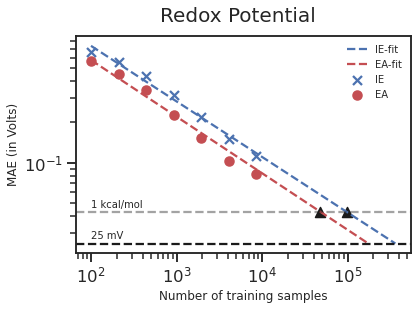

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(num_train_, ie_mae_, c='b', marker="x", label='IE')
ax1.scatter(num_train_, ea_mae_, c='r', marker="o", label='EA')

ax1.scatter(np.exp(xie),0.043 , c='k', marker="^",s=100)
ax1.scatter(np.exp(xea),0.043 , c='k', marker="^",s=100)


z_ie = np.polyfit(num_train_ie_log,ie_mae_log, 1)
z_ea = np.polyfit(num_train_ea_log,ea_mae_log, 1)

p_ie = np.poly1d(z_ie)
p_ea = np.poly1d(z_ea)

x_ie, y_ie = [],[]
for i in range(len(ie_mae_log)):
    x_ie.append(10**(num_train_ie_log[i]))
    y_ie.append(10**(p_ie(num_train_ie_log[i])))

x_ea, y_ea = [],[]
for i in range(len(ea_mae_log)):
    x_ea.append(10**(num_train_ea_log[i]))
    y_ea.append(10**(p_ea(num_train_ea_log[i])))


ax1.plot(x_ie, y_ie, c='b', label='IE-fit',linestyle='dashed')
ax1.plot(x_ea, y_ea, c='r', label='EA-fit',linestyle='dashed')

# ys_ie = p_ie(num_train_ie)
# ys_ea = p_ea(num_train_ea)

# plt.plot(num_train_ie_log,ie_mae_log)
# plt.plot(num_train_ea_log,ea_mae_log)
# plt.plot(num_train_ie,ys_ie)
# plt.plot(num_train_ea,ys_ea)


# z_ie = np.polyfit(np.log10(num_train_ie), np.log10(ie_mae_ex), 1)
# z_ea = np.polyfit(np.log10(num_train_ea), np.log10(ea_mae_ex), 1)

# p_ie = np.poly1d(z_ie)
# p_ea = np.poly1d(z_ea)

# plt.plot(10**(np.array(ie_mae_log)),10**(p_ie(ie_mae_log)))
# plt.plot(10**(ea_mae_log),10**(p_ea(ea_mae_log)))


fig.suptitle('Redox Potential', fontsize=20)

ax1.set_xscale('log')
ax1.set_yscale('log')
# plt.xscale('log')
# plt.yscale('log')


plt.axhline(y=0.025, color='k', linestyle='--')
plt.axhline(y=0.043, color='k', linestyle='--',alpha=0.4)
plt.text(100, 0.027, '25 mV')
plt.text(100, 0.046, '1 kcal/mol')
plt.xlabel('Number of training samples', fontsize=12)
plt.ylabel('MAE (in Volts)', fontsize=12)
plt.legend(fontsize=10)
fig.savefig('MAE-ex-log-log-plot-water-for-proposal.jpg',dpi=300, bbox_inches='tight')
plt.show()